In [2]:
import pandas as pd
import numpy as np
from sklearn .preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, classification_report
import seaborn as sb
import matplotlib.pyplot as plt




In [3]:
headerList = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R17', 'R18', 'R19', 'R20', 'R21', 'R22', 'R23', 'R24', 'Moment']
print(headerList)


['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R17', 'R18', 'R19', 'R20', 'R21', 'R22', 'R23', 'R24', 'Moment']


In [9]:
data24 = pd.read_csv(r"C:\Users\HP\sensor_readings_24.csv", header = None, names=headerList)
data24.to_csv(r"C:\Users\HP\sensor_readings_24.csv", index=False)
print(data24)

          R1     R2     R3     R4     R5     R6     R7     R8     R9    R10  \
0.438  0.498  3.625  3.645  5.000  2.918  5.000  2.351  2.332  2.643  1.698   
0.438  0.498  3.625  3.648  5.000  2.918  5.000  2.637  2.332  2.649  1.695   
0.438  0.498  3.625  3.629  5.000  2.918  5.000  2.637  2.334  2.643  1.696   
0.437  0.501  3.625  3.626  5.000  2.918  5.000  2.353  2.334  2.642  1.730   
0.438  0.498  3.626  3.629  5.000  2.918  5.000  2.640  2.334  2.639  1.696   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
0.910  5.000  3.997  2.785  2.770  2.572  2.433  1.087  1.772  1.040  1.024   
0.926  5.000  4.015  2.792  2.777  2.571  1.768  1.071  1.762  1.021  1.005   
0.937  5.000  4.034  2.799  2.784  2.571  1.754  1.053  1.752  1.002  0.987   
0.945  4.052  4.052  2.809  2.791  2.441  1.757  1.034  1.743  0.983  0.967   
0.950  4.066  5.000  2.819  2.798  2.570  2.422  1.016  1.739  0.964  0.949   

       ...    R15    R17    R18    R19    R20    R2

In [10]:
data24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, 0.438 to 0.95
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R1      5456 non-null   float64
 1   R2      5456 non-null   float64
 2   R3      5456 non-null   float64
 3   R4      5456 non-null   float64
 4   R5      5456 non-null   float64
 5   R6      5456 non-null   float64
 6   R7      5456 non-null   float64
 7   R8      5456 non-null   float64
 8   R9      5456 non-null   float64
 9   R10     5456 non-null   float64
 10  R11     5456 non-null   float64
 11  R12     5456 non-null   float64
 12  R13     5456 non-null   float64
 13  R14     5456 non-null   float64
 14  R15     5456 non-null   float64
 15  R17     5456 non-null   float64
 16  R18     5456 non-null   float64
 17  R19     5456 non-null   float64
 18  R20     5456 non-null   float64
 19  R21     5456 non-null   float64
 20  R22     5456 non-null   float64
 21  R23     5456 non-null   float64
 22  R

In [11]:
data24.describe()

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R14,R15,R17,R18,R19,R20,R21,R22,R23,R24
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,2.549398,...,2.205772,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508
std,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,1.382029,...,1.715435,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480
min,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,0.783000,...,0.495000,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,1.579000,...,0.860000,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000
50%,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,1.999500,...,1.328500,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000
75%,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,3.216250,...,4.436250,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250
max,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,5.019000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
data24.isnull()

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R15,R17,R18,R19,R20,R21,R22,R23,R24,Moment
0.438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0.438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0.438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0.437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0.438,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.910,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0.926,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0.937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0.945,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data24.head()

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R15,R17,R18,R19,R20,R21,R22,R23,R24,Moment
0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,1.698,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,1.695,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,1.696,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,1.730,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,1.696,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


In [14]:
data24.tail()

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R15,R17,R18,R19,R20,R21,R22,R23,R24,Moment
0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,1.024,...,0.660,0.648,0.657,0.686,5.000,1.045,5.0,5.0,1.562,Move-Forward
0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,1.005,...,0.652,0.640,0.649,1.593,1.616,1.058,5.0,5.0,1.085,Sharp-Right-Turn
0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,0.987,...,0.648,0.633,0.642,0.741,5.000,1.065,5.0,5.0,1.105,Sharp-Right-Turn
0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,0.967,...,0.641,0.626,0.635,0.754,5.000,1.076,5.0,5.0,1.118,Move-Forward
0.950,4.066,5.000,2.819,2.798,2.570,2.422,1.016,1.739,0.964,0.949,...,0.635,0.618,0.628,0.776,5.000,1.083,5.0,5.0,1.168,Sharp-Right-Turn


In [16]:
label_encoder = LabelEncoder()
data24["Moment"] = label_encoder.fit_transform(data24["Moment"])


In [17]:
data24.head()

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R15,R17,R18,R19,R20,R21,R22,R23,R24,Moment
0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,1.698,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,3
0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,1.695,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,3
0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,1.696,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,3
0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,1.730,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,3
0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,1.696,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,3


In [18]:
data24.value_counts('Moment')

Moment
0    2205
1    2097
3     826
2     328
Name: count, dtype: int64

In [19]:
x=data24.drop(['Moment'],axis=1)
y=data24['Moment']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


              R1        R2        R3        R4        R5        R6        R7  \
R1      1.000000  0.323046  0.163488  0.149413  0.048565 -0.055028 -0.008596   
R2      0.323046  1.000000  0.396655  0.329760  0.161001 -0.072938 -0.186465   
R3      0.163488  0.396655  1.000000  0.626803  0.315309 -0.067964 -0.127967   
R4      0.149413  0.329760  0.626803  1.000000  0.489932  0.077817 -0.002550   
R5      0.048565  0.161001  0.315309  0.489932  1.000000  0.382777  0.200489   
R6     -0.055028 -0.072938 -0.067964  0.077817  0.382777  1.000000  0.406891   
R7     -0.008596 -0.186465 -0.127967 -0.002550  0.200489  0.406891  1.000000   
R8     -0.052476 -0.220046 -0.169434 -0.170375  0.114697  0.432018  0.536807   
R9     -0.092430 -0.179122 -0.115552 -0.100226 -0.019028  0.256569  0.551395   
R10    -0.219792 -0.157230 -0.116770 -0.123872 -0.147906  0.098363  0.292638   
R11    -0.147006 -0.235032 -0.165835 -0.104604 -0.163720  0.031076  0.003404   
R12    -0.206211 -0.182399 -0.145734 -0.

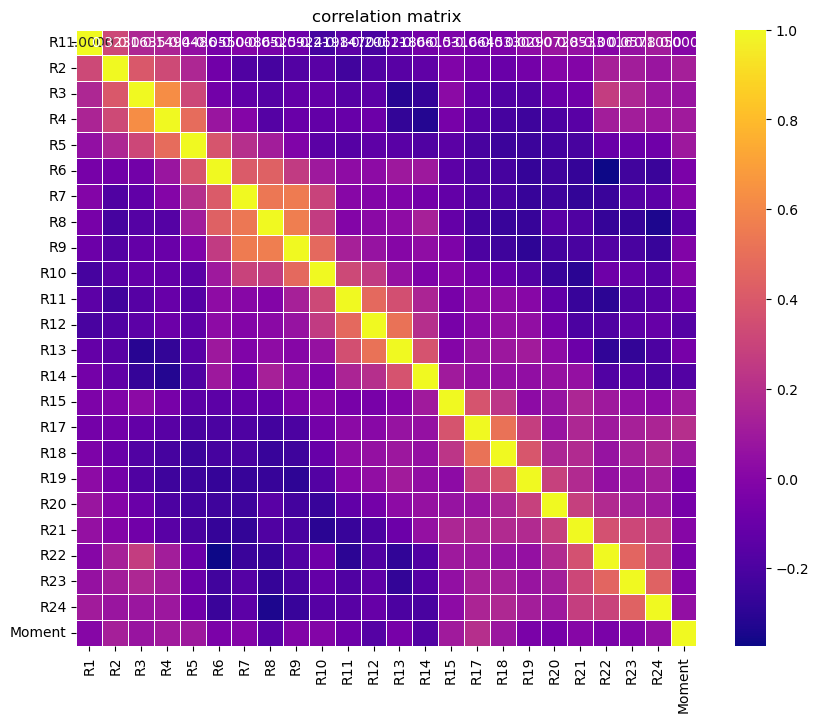

In [21]:
correlation_matrix = data24.corr()
print(correlation_matrix)

plt.figure(figsize =(10, 8))
sb.heatmap(correlation_matrix, annot=True,cmap='plasma', fmt=".4f", linewidths = 0.7)
plt.title("correlation matrix")
plt.show()


In [22]:
s1 = SVC()
s1.fit(x_train,y_train)
y_pred = s1.predict(x_test)
print(y_pred)

[1 0 0 ... 1 0 0]


In [23]:
s = accuracy_score(y_test, y_pred)
print(s)

0.8745421245421245


In [24]:
n = KNeighborsClassifier()
n.fit(x_train,y_train)
d= n.predict(x_test)
print(d)
f = accuracy_score(y_test,d)
print(f)

[1 0 0 ... 1 0 0]
0.8516483516483516


In [25]:

h = DecisionTreeClassifier()

h.fit(x_train, y_train)

i = h.predict(x_test)
print(i)
l=accuracy_score(y_test,i)
print(l)

[1 0 0 ... 1 0 0]
0.9954212454212454


In [26]:
#Doing Hyperparameter Tuning as Grid_Search for SVC


In [27]:
#doing GridSearch(Hyperperameter tuning)
parameters = {
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [1, 5, 10, 20]
}

In [28]:
#grid search
classifier = GridSearchCV(s1, parameters, cv=5)
classifier.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [30]:
classifier.cv_results_

{'mean_fit_time': array([1.09397769, 0.42763386, 0.51875615, 1.0176271 , 2.89059777,
        0.53454418, 0.4585947 , 0.97255578, 5.26298695, 0.58547502,
        0.37832098, 0.90593252, 9.13969545, 0.6756546 , 0.38729997,
        0.96060576]),
 'std_fit_time': array([0.12696446, 0.0459635 , 0.05285955, 0.07345921, 0.1882605 ,
        0.06952881, 0.02423819, 0.07198809, 0.45520202, 0.04188702,
        0.03625557, 0.10294815, 0.70488087, 0.09150879, 0.03529518,
        0.09073297]),
 'mean_score_time': array([0.10056772, 0.06829357, 0.28404689, 0.25857301, 0.08606791,
        0.04639745, 0.22306767, 0.23435764, 0.0990387 , 0.05744581,
        0.19236412, 0.24402571, 0.09280396, 0.04527483, 0.17019062,
        0.23697195]),
 'std_score_time': array([0.00935853, 0.01107468, 0.02666242, 0.02932086, 0.00858643,
        0.00173252, 0.02361856, 0.03914436, 0.00657457, 0.00873558,
        0.01982069, 0.04155026, 0.00875054, 0.00777399, 0.00913032,
        0.01529748]),
 'param_C': masked_array(d

In [31]:
#best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 5, 'kernel': 'poly'}


In [32]:
#highest accuracy
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.87775707335744


In [33]:
#loding the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)
result.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.093978,0.126964,0.100568,0.009359,1,linear,"{'C': 1, 'kernel': 'linear'}",0.704212,0.681027,0.678277,0.725940,0.745188,0.706929,0.025785,9
1,0.427634,0.045963,0.068294,0.011075,1,poly,"{'C': 1, 'kernel': 'poly'}",0.820513,0.822181,0.896425,0.912007,0.879927,0.866211,0.038014,7
2,0.518756,0.052860,0.284047,0.026662,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.788462,0.788268,0.870761,0.880843,0.878093,0.841285,0.043335,8
3,1.017627,0.073459,0.258573,0.029321,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.402015,0.373052,0.323556,0.309808,0.441797,0.370045,0.048927,13
4,2.890598,0.188261,0.086068,0.008586,5,linear,"{'C': 5, 'kernel': 'linear'}",0.699634,0.685610,0.676444,0.723190,0.745188,0.706013,0.025144,10


In [34]:
#Doing Hyperparameter Tuning as Grid_Search for KNeighborsClassifier

In [36]:
parameters2 = {
              'n_neighbors': [1, 3, 5],
              'weights': ['uniform', 'distance']

}

In [37]:
classifier2 = GridSearchCV(n, parameters2, cv=5)
classifier2.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']})

In [38]:
classifier2.cv_results_

{'mean_fit_time': array([0.00119815, 0.00715752, 0.00100398, 0.0014431 , 0.00164866,
        0.00243816]),
 'std_fit_time': array([0.00146743, 0.00710928, 0.0012712 , 0.00124178, 0.00137352,
        0.00049045]),
 'mean_score_time': array([0.10119872, 0.03118639, 0.09729505, 0.03693676, 0.09622102,
        0.03678212]),
 'std_score_time': array([0.00747523, 0.0052582 , 0.00424609, 0.00524741, 0.00358301,
        0.00076669]),
 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1, 'weights': 'uniform'},
  {'n_neighbors': 1, 'weights': 'distance'},
  {'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neig

In [39]:
#best parameters
best_parameters2 = classifier2.best_params_
print(best_parameters2)

{'n_neighbors': 5, 'weights': 'distance'}


In [40]:
#highest accuracy
highest_accuracy2 = classifier2.best_score_
print(highest_accuracy2)

0.7883144811192474


In [41]:
#loding the results to pandas dataframe
result2 = pd.DataFrame(classifier2.cv_results_)
result2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001198,0.001467,0.101199,0.007475,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.747253,0.711274,0.812099,0.840513,0.825848,0.787397,0.049631,2
1,0.007158,0.007109,0.031186,0.005258,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.747253,0.711274,0.812099,0.840513,0.825848,0.787397,0.049631,2
2,0.001004,0.001271,0.097295,0.004246,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.740842,0.719523,0.817599,0.835014,0.803850,0.783366,0.045040,5
3,0.001443,0.001242,0.036937,0.005247,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.744505,0.717690,0.818515,0.838680,0.812099,0.786298,0.046693,4
4,0.001649,0.001374,0.096221,0.003583,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.735348,0.733272,0.813016,0.841430,0.779102,0.780433,0.042522,6


In [42]:
#Doing Hyperparameter Tuning as Grid_Search for DecisionTree

In [43]:
#doing GridSearch(Hyperperameter tuning)
parameters3 = {
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15]
}

In [44]:
classifier3 = GridSearchCV(h, parameters3, cv=5)
classifier3.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15]})

In [45]:
classifier3.cv_results_

{'mean_fit_time': array([0.05716286, 0.04410219, 0.05400825, 0.04409838, 0.07467966,
        0.04861536, 0.0708385 , 0.08812356]),
 'std_fit_time': array([0.01173336, 0.00652797, 0.0132419 , 0.00669601, 0.01306722,
        0.00156973, 0.01027325, 0.01257756]),
 'mean_score_time': array([0.00121946, 0.00055509, 0.00115037, 0.00312457, 0.00040016,
        0.0020576 , 0.00197773, 0.00132813]),
 'std_score_time': array([0.00118122, 0.00111017, 0.00094352, 0.00624914, 0.00080032,
        0.00030923, 0.00107873, 0.00117131]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, 5, 10, 15, None, 5, 10, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'para

In [46]:
#best parameters
best_parameters3 = classifier3.best_params_
print(best_parameters3)

{'criterion': 'entropy', 'max_depth': 10}


In [47]:
#highest accuracy
highest_accuracy3 = classifier3.best_score_
print(highest_accuracy3)

0.9857084101355413


In [48]:
#loding the results to pandas dataframe
result3 = pd.DataFrame(classifier3.cv_results_)
result3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057163,0.011733,0.001219,0.001181,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.946886,0.981668,0.974335,0.995417,0.989918,0.977645,0.016969,6
1,0.044102,0.006528,0.000555,0.001110,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.898352,0.951421,0.944088,0.974335,0.950504,0.943740,0.024904,8
2,0.054008,0.013242,0.001150,0.000944,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.954212,0.981668,0.981668,0.996334,0.978002,0.978377,0.013625,5
3,0.044098,0.006696,0.003125,0.006249,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.956044,0.986251,0.974335,0.995417,0.981668,0.978743,0.013249,4
4,0.074680,0.013067,0.000400,0.000800,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.960623,0.976169,0.981668,0.991751,0.995417,0.981125,0.012348,3


In [51]:
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Display results
results_df = pd.DataFrame(results)
print(results_df)

NameError: name 'models' is not defined